In [1]:
import pandas as pd
import numpy as np

## Q-1

In [2]:
data = {'points':[18,19,14,14,11,20,28,30,31,35,33,25,25,27,29,30,19,23],
       'assists':[3,4,5,4,7,8,7,6,9,12,14,9,4,3,4,12,15,11],
       'rebounds':[15,14,10,8,14,13,9,5,4,11,6,5,3,8,12,7,6,5]}
df = pd.DataFrame(data)

In [3]:
df

,points,assists,rebounds
0,18,3,15
1,19,4,14
2,14,5,10
3,14,4,8
4,11,7,14
5,20,8,13
6,28,7,9
7,30,6,5
8,31,9,4
9,35,12,11



Iteration 1:
New centroids: [[27  7  9]
 [18  7  7]]

Iteration 2:
New centroids: [[29  8  7]
 [17  7 10]]

Iteration 3:
New centroids: [[28  8  6]
 [16  6 11]]

Iteration 4:
New centroids: [[28  8  6]
 [16  6 11]]
Convergence reached after iteration: 4


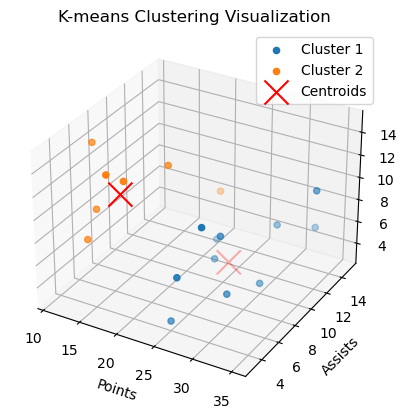

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def k_means(players, initial_centroids, k, iterations):
    centroids = initial_centroids

    def euclidean_distance(p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))
    
    for i in range(iterations):
        # Step 1: Calculate distances to each centroid
        distances = np.zeros((players.shape[0], k))  # Shape (n, k) where n is number of players, k is number of centroids
        for idx, centroid in enumerate(centroids):
            distances[:, idx] = np.linalg.norm(players - centroid, axis=1)  # Distance from each player to the current centroid
        
        # Step 2: Assign players to the nearest centroid (closest cluster)
        clusters = np.argmin(distances, axis=1)
        
        # Step 3: Update centroids by averaging the players in each cluster
        new_centroids = np.zeros_like(centroids)
        for j in range(k):
            cluster_points = players[clusters == j]  # Get all players in cluster j
            if len(cluster_points) > 0:
                new_centroids[j] = np.mean(cluster_points, axis=0)  # Update centroid j to be the mean of cluster j
        
        print(f"\nIteration {i+1}:")
        print("New centroids:", new_centroids)
        
        # Stop if centroids don't change anymore
        if np.all(centroids == new_centroids):
            print("Convergence reached after iteration:", i + 1)
            break
        
        centroids = new_centroids  # Update centroids for the next iteration
    
    return centroids, clusters

# Visualization function
def visualize_clusters(players, centroids, clusters):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot the players with different colors for each cluster
    for cluster in np.unique(clusters):
        cluster_points = players[clusters == cluster]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster+1}')

    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='x', label='Centroids')

    # Labels and title
    ax.set_xlabel('Points')
    ax.set_ylabel('Assists')
    ax.set_zlabel('Rebounds')
    ax.set_title('K-means Clustering Visualization')
    plt.legend()
    plt.show()

# Example usage
players = np.array([
    [18,3,15], 
    [19,4,14],  
    [14,5,10],  
    [14,4,8],   
    [11,7,14],
    [20,8,13],
    [28,7,9],
    [30,6,5],
    [31,9,4],
    [35,12,11],
    [33,14,6],
    [25,9,5],
    [25,4,3],
    [27,3,8],
    [29,4,12],
    [30,12,7],
    [19,15,6],
    [23,11,5]
])

# Initialize centroids (e.g., use P1 and P3 as initial centroids)
initial_centroids = np.array([
    [18,3,15],  # Centroid 1 (initial P1)
    [14,5,10]   # Centroid 2 (initial P3)
])

# Run the K-means algorithm with K=2, 5 iterations
final_centroids, final_clusters = k_means(players, initial_centroids, k=2, iterations=5)

# Visualize the final clusters
visualize_clusters(players, final_centroids, final_clusters)


## Updated code which is very generalized


Running K-means for K=1
Iteration 1: Centroids = [[23.94444444  7.61111111  8.61111111]]
Iteration 2: Centroids = [[23.94444444  7.61111111  8.61111111]]
Convergence reached.


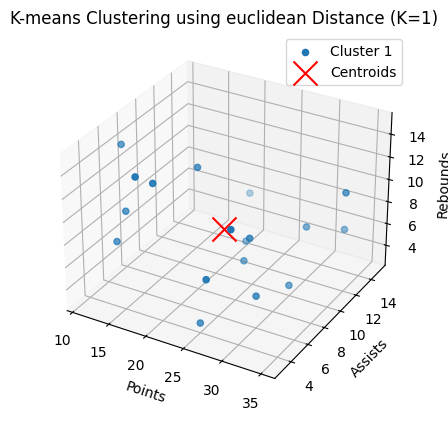

SSE for K=1: 1347.5

Running K-means for K=2
Iteration 1: Centroids = [[18.11111111  6.77777778  9.77777778]
 [29.77777778  8.44444444  7.44444444]]
Iteration 2: Centroids = [[16.42857143  6.57142857 11.42857143]
 [28.72727273  8.27272727  6.81818182]]
Iteration 3: Centroids = [[16.42857143  6.57142857 11.42857143]
 [28.72727273  8.27272727  6.81818182]]
Convergence reached.


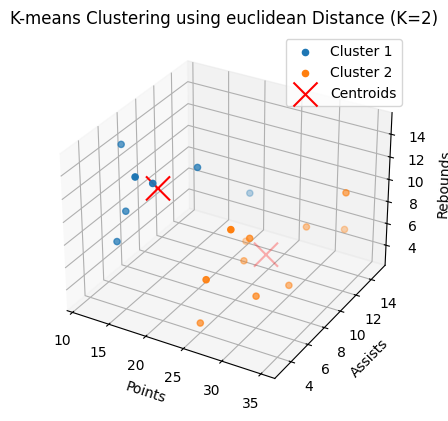

SSE for K=2: 597.1428571428571

Running K-means for K=3
Iteration 1: Centroids = [[21.         13.          5.5       ]
 [16.          5.16666667 12.33333333]
 [29.3         8.          7.        ]]
Iteration 2: Centroids = [[21.         13.          5.5       ]
 [16.          5.16666667 12.33333333]
 [29.3         8.          7.        ]]
Convergence reached.


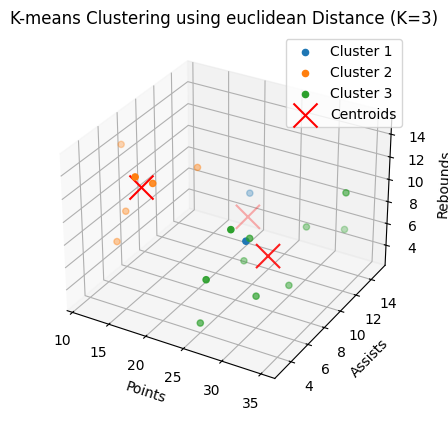

SSE for K=3: 440.7666666666667

Running K-means for K=4
Iteration 1: Centroids = [[18.8  7.   9.3]
 [31.5 13.   6.5]
 [29.   5.8  7.6]
 [35.  12.  11. ]]
Iteration 2: Centroids = [[17.25        7.125      10.625     ]
 [31.33333333 11.66666667  5.66666667]
 [27.33333333  5.5         7.        ]
 [35.         12.         11.        ]]
Iteration 3: Centroids = [[16.42857143  6.57142857 11.42857143]
 [31.33333333 11.66666667  5.66666667]
 [26.71428571  6.28571429  6.71428571]
 [35.         12.         11.        ]]
Iteration 4: Centroids = [[16.42857143  6.57142857 11.42857143]
 [31.33333333 11.66666667  5.66666667]
 [26.71428571  6.28571429  6.71428571]
 [35.         12.         11.        ]]
Convergence reached.


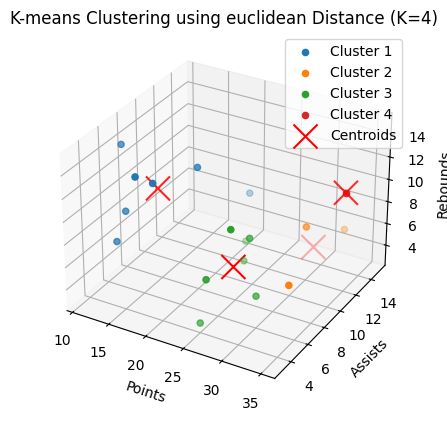

SSE for K=4: 411.42857142857144

 Final centroids for k=4:[[16.42857143  6.57142857 11.42857143]
 [31.33333333 11.66666667  5.66666667]
 [26.71428571  6.28571429  6.71428571]
 [35.         12.         11.        ]]

Table of data points and clusters:
    Points  Assists  Rebounds  Cluster (K=1)  Cluster (K=2)  Cluster (K=3)  \
0       18        3        15              0              0              1   
1       19        4        14              0              0              1   
2       14        5        10              0              0              1   
3       14        4         8              0              0              1   
4       11        7        14              0              0              1   
5       20        8        13              0              0              1   
6       28        7         9              0              1              2   
7       30        6         5              0              1              2   
8       31        9         4              0   

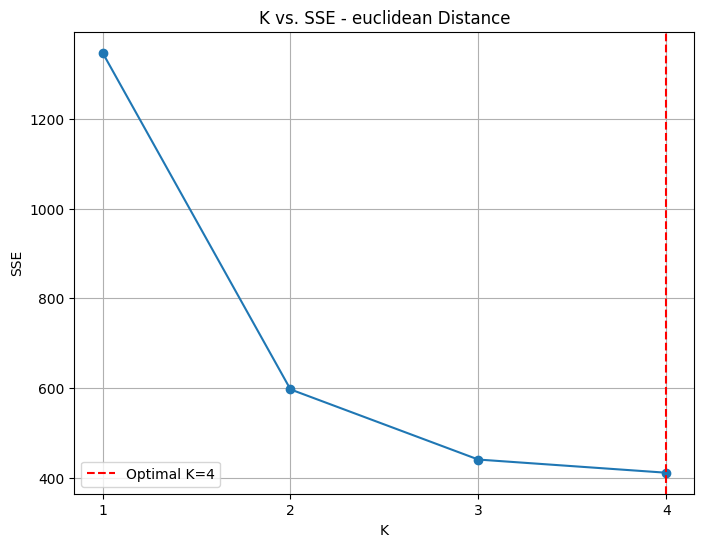

Optimal K based on minimum SSE: K=4


In [67]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# Initialization function to randomly select initial centroids
def init_c(X, k):
    return X[random.sample(range(X.shape[0]), k)]

# Assignment function to assign each data point to its nearest centroid
def assign_c(X, c, d_func):
    dist = np.array([[d_func(x, centroid) for centroid in c] for x in X])
    return np.argmin(dist, axis=1)

# Update function to update centroids based on the assigned labels
def update_c(X, l, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[l == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            new_centroids.append(X[np.random.choice(range(X.shape[0]))])
    return np.array(new_centroids)

# K-Means algorithm
def kmeans(X, k, d_func, max_iters=100):
    c = init_c(X, k)
    for iteration in range(max_iters):
        l = assign_c(X, c, d_func)
        new_c = update_c(X, l, k)
        
        # Print centroids after each iteration
        print(f"Iteration {iteration + 1}: Centroids = {new_c}")
        
        if np.all(c == new_c):
            print("Convergence reached.")
            break
        c = new_c
    return l, c

# Calculate SSE for a cluster
def calc_sse(X, l, c, d_func):
    sse = 0
    for i in range(len(c)):
        cluster_points = X[l == i]
        sse += np.sum([d_func(point, c[i]) ** 2 for point in cluster_points])
    return sse

# Distance functions
def euc_dist(a, b):
    return np.linalg.norm(a - b)

def man_dist(a, b):
    return np.sum(np.abs(a - b))

def mink_dist(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

# Visualization function
def visualize_clusters(players, centroids, clusters, distance_name, k):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for cluster in np.unique(clusters):
        cluster_points = players[clusters == cluster]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster+1}')

    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='x', label='Centroids')
    ax.set_xlabel('Points')
    ax.set_ylabel('Assists')
    ax.set_zlabel('Rebounds')
    ax.set_title(f'K-means Clustering using {distance_name} Distance (K={k})')
    plt.legend()
    plt.show()

# Example data for players
players = np.array([
    [18, 3, 15], 
    [19, 4, 14],  
    [14, 5, 10],  
    [14, 4, 8],   
    [11, 7, 14],
    [20, 8, 13],
    [28, 7, 9],
    [30, 6, 5],
    [31, 9, 4],
    [35, 12, 11],
    [33, 14, 6],
    [25, 9, 5],
    [25, 4, 3],
    [27, 3, 8],
    [29, 4, 12],
    [30, 12, 7],
    [19, 15, 6],
    [23, 11, 5]
])

# Hard-coded choice of distance metric
distance_choice = "euclidean"  # Options: "euclidean", "manhattan", "minkowski"
metrics = {"euclidean": euc_dist, "manhattan": man_dist, "minkowski": lambda a, b: mink_dist(a, b, p=3)}
# d_func = {"euclidean": euc_dist, "manhattan": man_dist, "minkowski": lambda a, b: mink_dist(a, b, p=3)}[distance_choice]
d_func = metrics[distance_choice]


k_values = [1, 2, 3, 4]
sse_list = []
results_table = pd.DataFrame(players, columns=['Points', 'Assists', 'Rebounds'])

for k in k_values:
    print(f"\nRunning K-means for K={k}")
    l, c = kmeans(players, k, d_func)
    sse = calc_sse(players, l, c, d_func)
    sse_list.append(sse)
    results_table[f'Cluster (K={k})'] = l
    visualize_clusters(players, c, l, distance_choice, k)
    print(f"SSE for K={k}: {sse}")

print(f"\n Final centroids for k={k_values[-1]}:{c}")
print(f"\nTable of data points and clusters:\n{results_table}")


# Plot K vs SSE
optimal_k = k_values[sse_list.index(min(sse_list))]
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse_list, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K={optimal_k}')
plt.title(f'K vs. SSE - {distance_choice} Distance')
plt.xlabel('K')
plt.ylabel('SSE')
plt.legend()
plt.grid()
plt.xticks(k_values)
plt.show()

print(f"Optimal K based on minimum SSE: K={optimal_k}")
# print(f"\nTable of data points and clusters:\n{results_table}")


## Q-2 and Q-3


Using Euc Distance


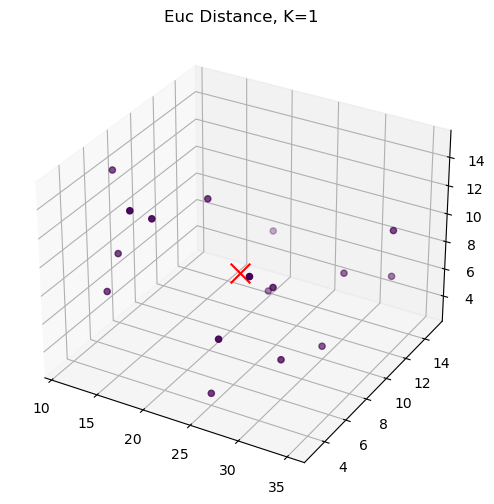

SSE for K=1, Euc Distance: 1330.4705882352944


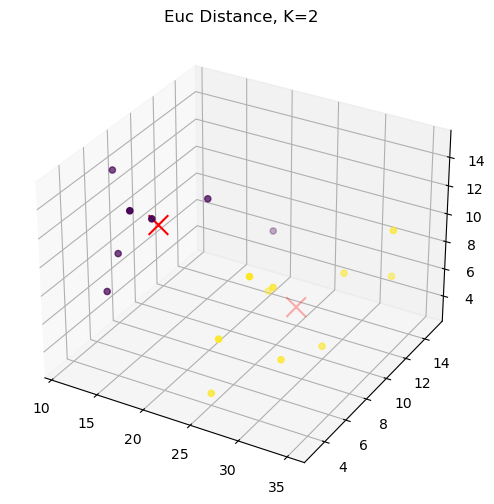

SSE for K=2, Euc Distance: 577.6428571428571


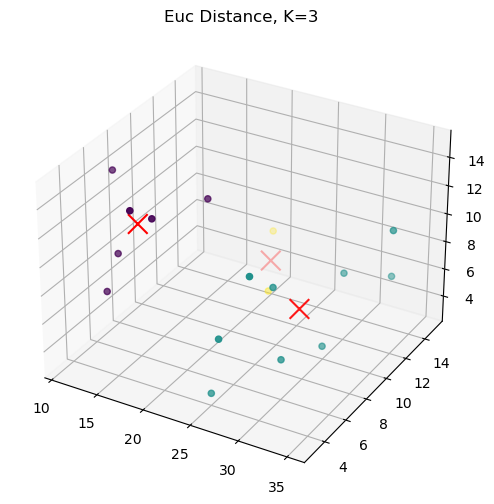

SSE for K=3, Euc Distance: 414.6666666666667


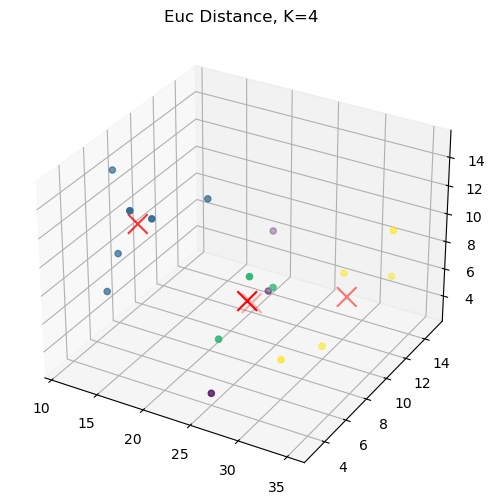

SSE for K=4, Euc Distance: 310.03333333333336

Table of data points and clusters for Euc distance:
     X1  X2  X3  Cluster (K=1)  Cluster (K=2)  Cluster (K=3)  Cluster (K=4)
0   18   3  15              0              0              0              1
1   19   4  14              0              0              0              1
2   14   5  10              0              0              0              1
3   14   4   8              0              0              0              1
4   11   7  14              0              0              0              1
5   20   8  13              0              0              0              1
6   28   7   9              0              1              1              2
7   30   6   5              0              1              1              3
8   31   9   4              0              1              1              3
9   35  12  11              0              1              1              3
10  33  14   6              0              1              1              3


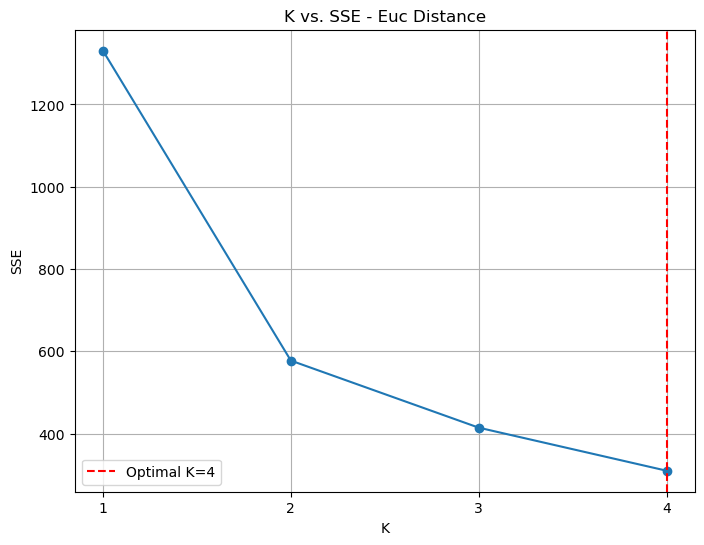


Using Man Distance


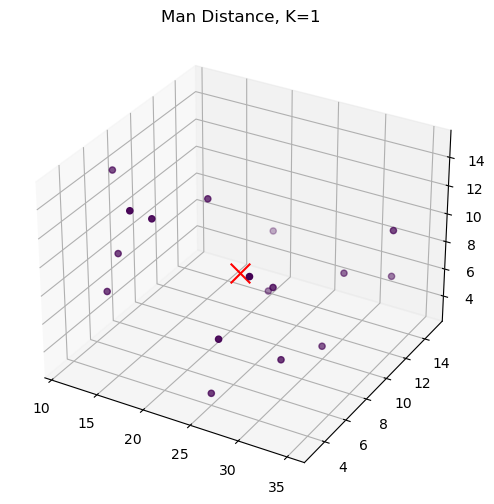

SSE for K=1, Man Distance: 3027.0726643598614


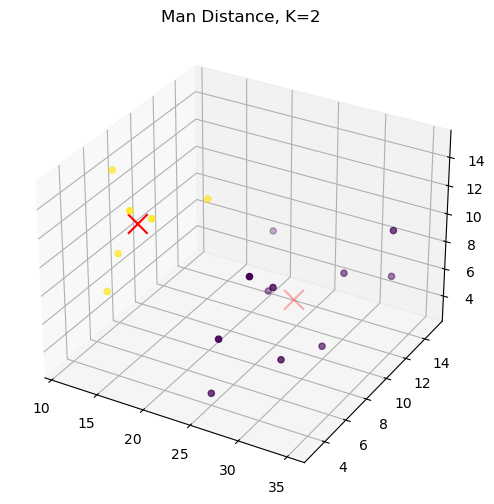

SSE for K=2, Man Distance: 1396.8461891643708


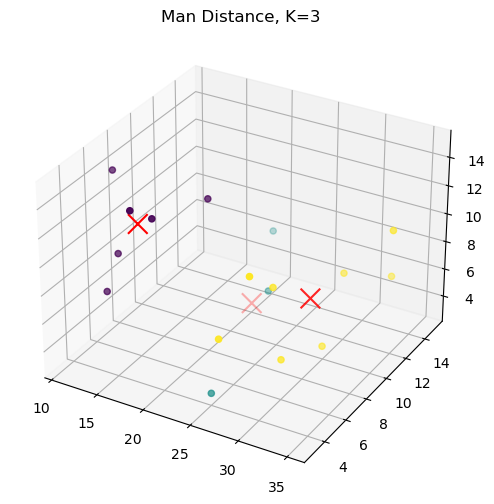

SSE for K=3, Man Distance: 1006.0069444444445


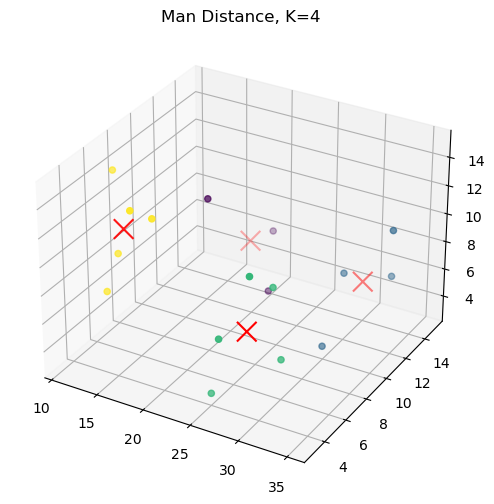

SSE for K=4, Man Distance: 665.8588888888888

Table of data points and clusters for Man distance:
     X1  X2  X3  Cluster (K=1)  Cluster (K=2)  Cluster (K=3)  Cluster (K=4)
0   18   3  15              0              1              0              3
1   19   4  14              0              1              0              3
2   14   5  10              0              1              0              3
3   14   4   8              0              1              0              3
4   11   7  14              0              1              0              3
5   20   8  13              0              1              0              0
6   28   7   9              0              0              2              2
7   30   6   5              0              0              2              2
8   31   9   4              0              0              2              1
9   35  12  11              0              0              2              1
10  33  14   6              0              0              2              1
1

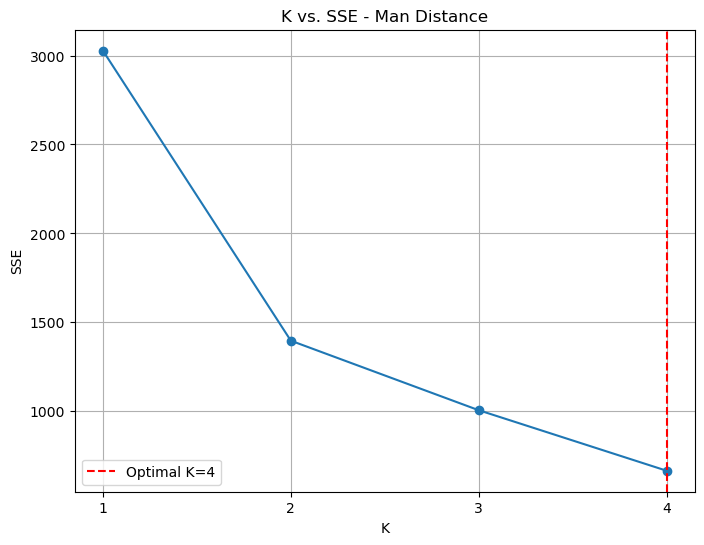


Using Mink (p=3) Distance


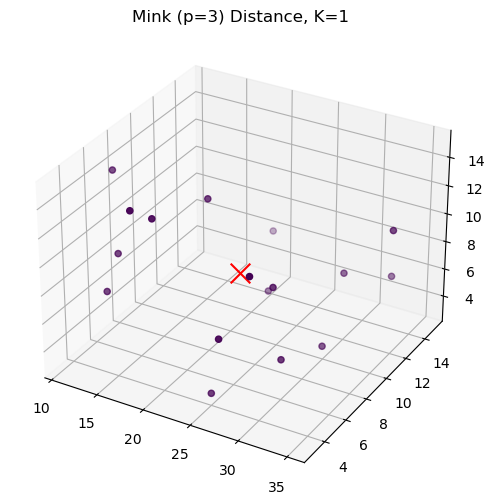

SSE for K=1, Mink (p=3) Distance: 1098.5295829955537


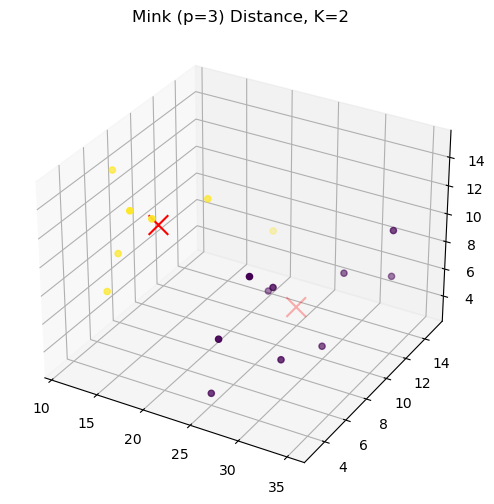

SSE for K=2, Mink (p=3) Distance: 452.03041720211087


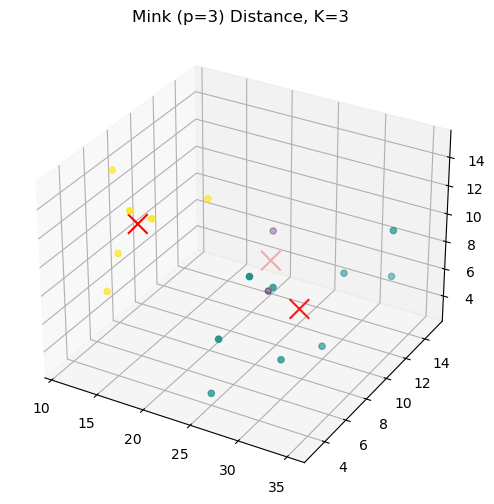

SSE for K=3, Mink (p=3) Distance: 326.7058761248975


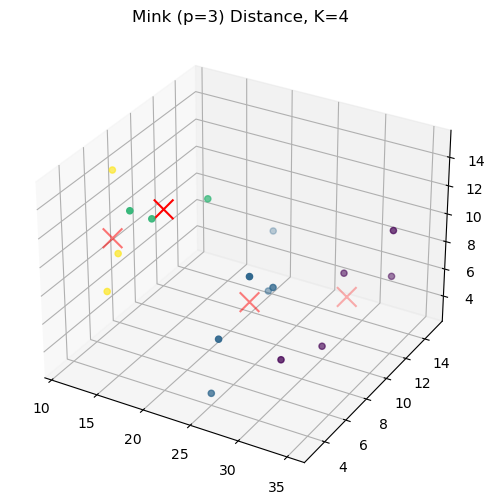

SSE for K=4, Mink (p=3) Distance: 290.5510351206123

Table of data points and clusters for Mink (p=3) distance:
     X1  X2  X3  Cluster (K=1)  Cluster (K=2)  Cluster (K=3)  Cluster (K=4)
0   18   3  15              0              1              2              2
1   19   4  14              0              1              2              2
2   14   5  10              0              1              2              3
3   14   4   8              0              1              2              3
4   11   7  14              0              1              2              3
5   20   8  13              0              1              2              2
6   28   7   9              0              0              1              1
7   30   6   5              0              0              1              0
8   31   9   4              0              0              1              0
9   35  12  11              0              0              1              0
10  33  14   6              0              0              1   

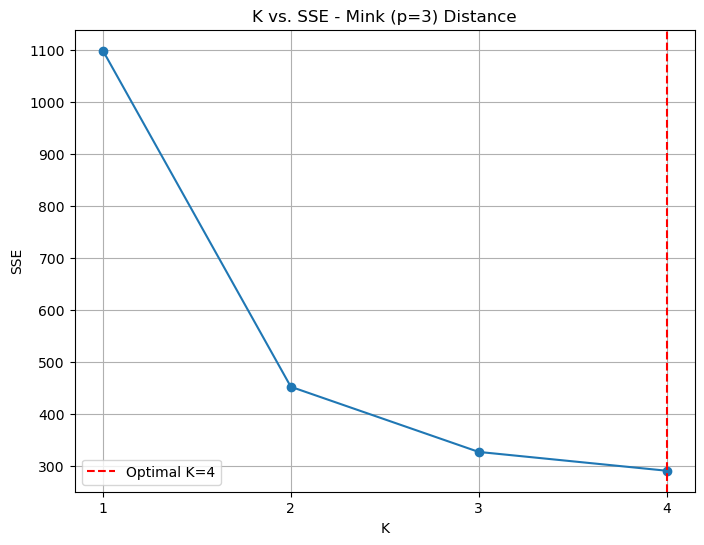

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Initialization function to randomly select initial centroids
def init_c(X, k):
    return X[random.sample(range(X.shape[0]), k)]

# Assignment function to assign each data point to its nearest centroid
def assign_c(X, c, d_func):
    dist = np.array([[d_func(x, centroid) for centroid in c] for x in X])
    return np.argmin(dist, axis=1) 

# Update function to update centroids based on the assigned labels
def update_c(X, l, k):
    return np.array([X[l == i].mean(axis=0) for i in range(k)])

# K-Means algorithm
def kmeans(X, k, d_func, max_iters=100):
    c = init_c(X, k)
    for _ in range(max_iters):
        l = assign_c(X, c, d_func)
        new_c = update_c(X, l, k)
        if np.all(c == new_c):
            break
        c = new_c
    return l, c

# Calculate SSE for a cluster
def calc_sse(X, l, c, d_func):
    sse = 0
    for i in range(len(c)):  # For each cluster
        cluster_points = X[l == i]
        sse += np.sum([d_func(point, c[i]) ** 2 for point in cluster_points])
    return sse

# Distance functions
def euc_dist(a, b):
    return np.linalg.norm(a - b)

def man_dist(a, b):
    return np.sum(np.abs(a - b))

def mink_dist(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

# Example usage
X = np.array([
    [18, 3, 15], [19, 4, 14], [14, 5, 10], [14, 4, 8], [11, 7, 14], 
    [20, 8, 13], [28, 7, 9], [30, 6, 5], [31, 9, 4], [35, 12, 11], 
    [33, 14, 6], [25, 4, 3], [27, 3, 8], [29, 4, 12], [30, 12, 7], 
    [19, 15, 6], [23, 11, 5]
])

k_values = [1, 2, 3, 4]
metrics = {
    "Euc": euc_dist,
    "Man": man_dist,
    "Mink (p=3)": lambda a, b: mink_dist(a, b, p=3),
}

# Iterate through each metric
for m_name, d_func in metrics.items():
    print(f"\nUsing {m_name} Distance")
    sse_list = []

    # Dataframe for storing data points, labels, and SSE for each K value
    results_table = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])

    for k in k_values:
        l, c = kmeans(X, k, d_func)
        sse = calc_sse(X, l, c, d_func)
        sse_list.append(sse)
        
        # Add cluster labels for this K value to the table
        results_table[f'Cluster (K={k})'] = l

        # Plot the clusters and centroids
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=l, cmap='viridis', marker='o')
        ax.scatter(c[:, 0], c[:, 1], c[:, 2], c='red', marker='x', s=200, label='Centroids')
        ax.set_title(f'{m_name} Distance, K={k}')
        plt.show()

        print(f"SSE for K={k}, {m_name} Distance: {sse}")

    # Display the table of data points and their clusters
    print(f"\nTable of data points and clusters for {m_name} distance:\n", results_table)

    # Plot K vs SSE
    optimal_k = k_values[sse_list.index(min(sse_list))]
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, sse_list, marker='o')
    plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K={optimal_k}')
    plt.title(f'K vs. SSE - {m_name} Distance')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.legend()
    plt.grid()
    plt.xticks(k_values)
    plt.show()


##  Additional Questions


Using Euc Distance


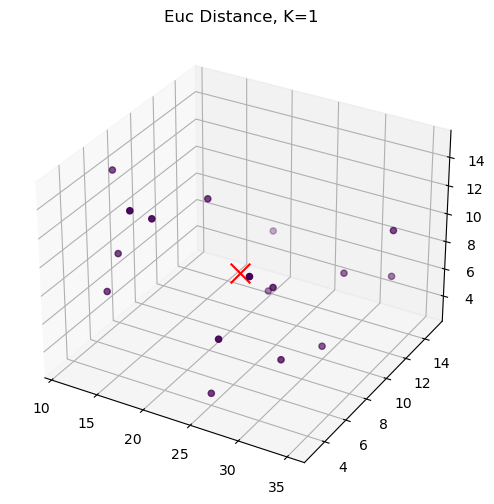

SSE for K=1, Euc Distance: 1330.4705882352944


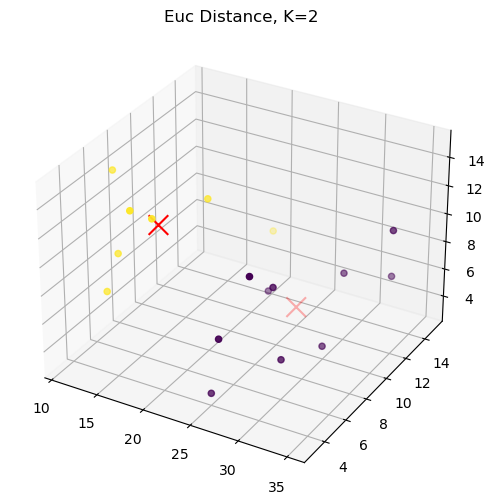

SSE for K=2, Euc Distance: 577.6428571428572


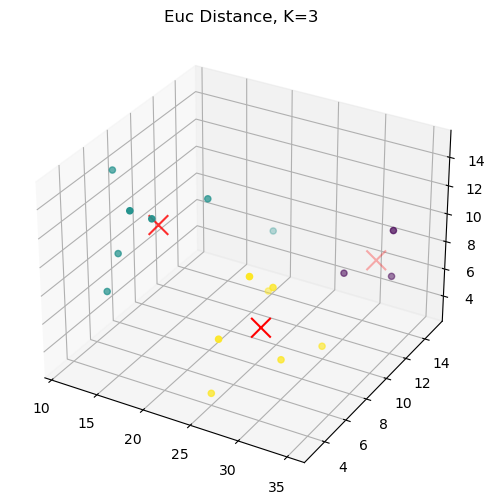

SSE for K=3, Euc Distance: 433.33333333333337


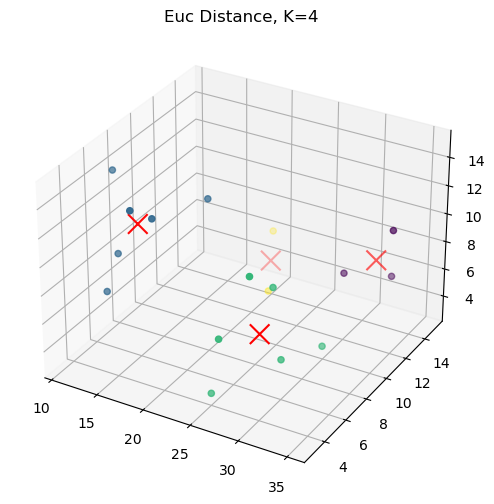

SSE for K=4, Euc Distance: 271.6666666666667

Table of data points and clusters for Euc distance:
     X1  X2  X3  Cluster (K=1)  Cluster (K=2)  Cluster (K=3)  Cluster (K=4)
0   18   3  15              0              1              1              1
1   19   4  14              0              1              1              1
2   14   5  10              0              1              1              1
3   14   4   8              0              1              1              1
4   11   7  14              0              1              1              1
5   20   8  13              0              1              1              1
6   28   7   9              0              0              2              2
7   30   6   5              0              0              2              2
8   31   9   4              0              0              2              2
9   35  12  11              0              0              0              0
10  33  14   6              0              0              0              0
1

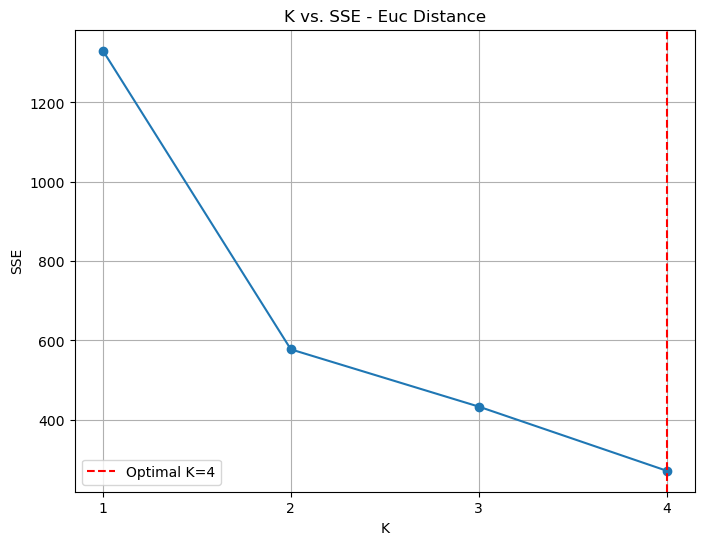


Using Man Distance


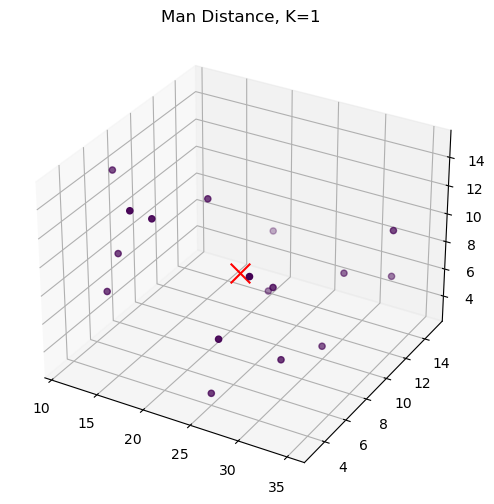

SSE for K=1, Man Distance: 3027.0726643598614


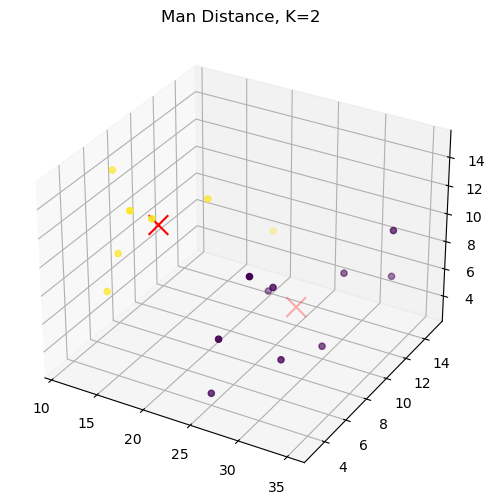

SSE for K=2, Man Distance: 1446.8216326530612


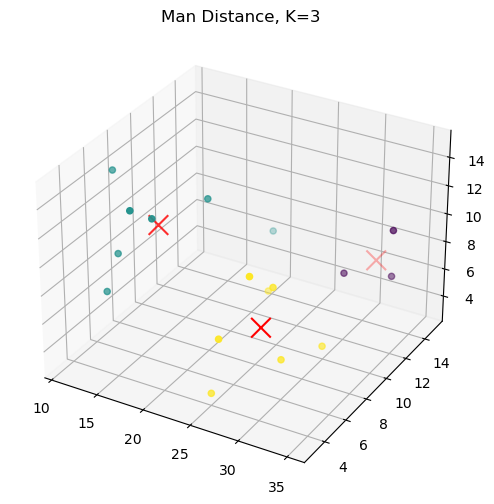

SSE for K=3, Man Distance: 1095.8140589569161


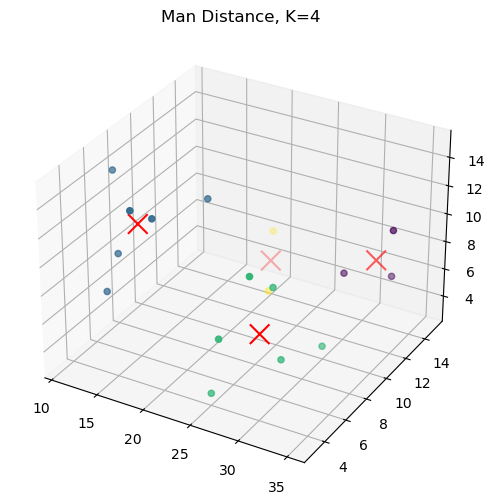

SSE for K=4, Man Distance: 661.3333333333334

Table of data points and clusters for Man distance:
     X1  X2  X3  Cluster (K=1)  Cluster (K=2)  Cluster (K=3)  Cluster (K=4)
0   18   3  15              0              1              1              1
1   19   4  14              0              1              1              1
2   14   5  10              0              1              1              1
3   14   4   8              0              1              1              1
4   11   7  14              0              1              1              1
5   20   8  13              0              1              1              1
6   28   7   9              0              0              2              2
7   30   6   5              0              0              2              2
8   31   9   4              0              0              2              2
9   35  12  11              0              0              0              0
10  33  14   6              0              0              0              0
1

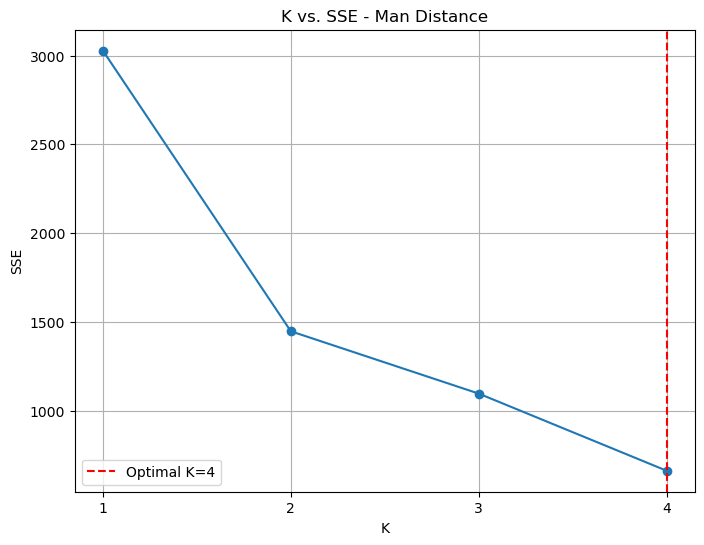


Using Mink (p=3) Distance


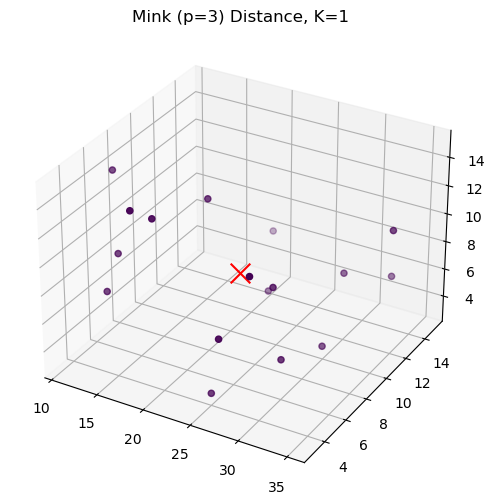

SSE for K=1, Mink (p=3) Distance: 1330.4705882352944


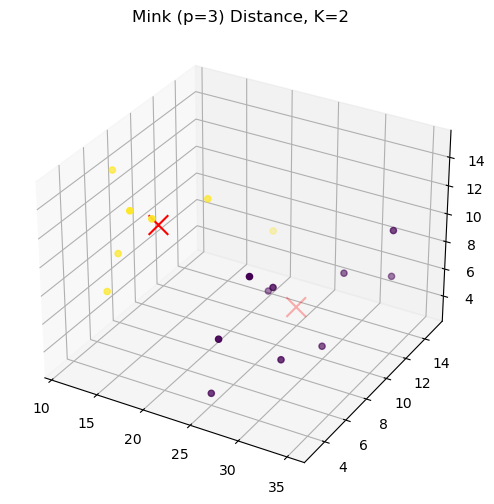

SSE for K=2, Mink (p=3) Distance: 577.6428571428572


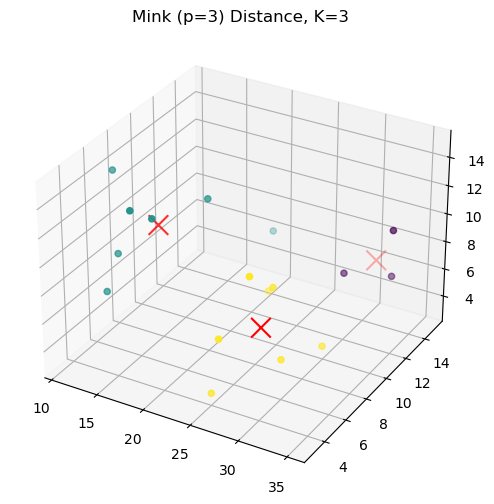

SSE for K=3, Mink (p=3) Distance: 433.33333333333337


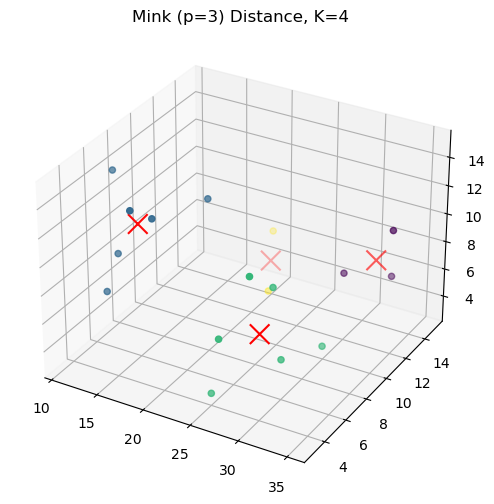

SSE for K=4, Mink (p=3) Distance: 271.6666666666667

Table of data points and clusters for Mink (p=3) distance:
     X1  X2  X3  Cluster (K=1)  Cluster (K=2)  Cluster (K=3)  Cluster (K=4)
0   18   3  15              0              1              1              1
1   19   4  14              0              1              1              1
2   14   5  10              0              1              1              1
3   14   4   8              0              1              1              1
4   11   7  14              0              1              1              1
5   20   8  13              0              1              1              1
6   28   7   9              0              0              2              2
7   30   6   5              0              0              2              2
8   31   9   4              0              0              2              2
9   35  12  11              0              0              0              0
10  33  14   6              0              0              0   

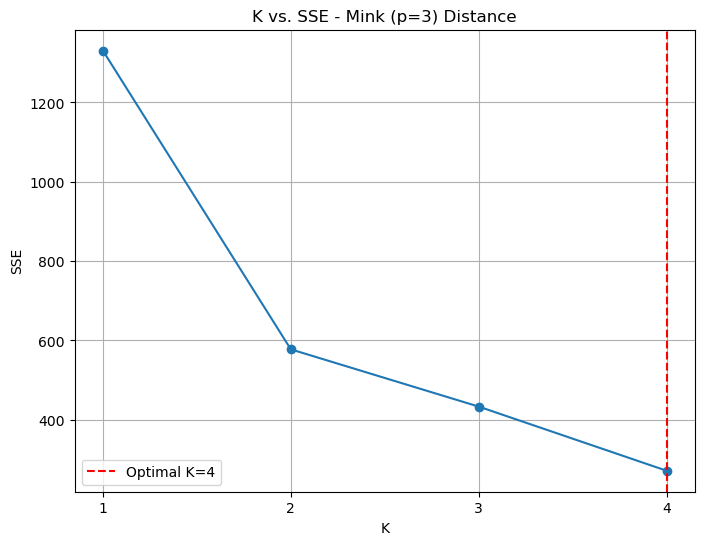

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import pandas as pd
from scipy.spatial.distance import cdist

# Calculate SSE for a cluster
def calc_sse(X, kmeans, d_func):
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    distances = cdist(X, centroids, metric=d_func)
    sse = np.sum([np.min(distances[i]) ** 2 for i in range(len(X))])
    return sse

# Distance functions
metrics = {
    "Euc": "euclidean",
    "Man": "cityblock",
    "Mink (p=3)": lambda a, b: np.sum(np.abs(a - b) ** 3) ** (1 / 3),
}

# Example usage
X = np.array([
    [18, 3, 15], [19, 4, 14], [14, 5, 10], [14, 4, 8], [11, 7, 14], 
    [20, 8, 13], [28, 7, 9], [30, 6, 5], [31, 9, 4], [35, 12, 11], 
    [33, 14, 6], [25, 4, 3], [27, 3, 8], [29, 4, 12], [30, 12, 7], 
    [19, 15, 6], [23, 11, 5]
])

k_values = [1, 2, 3, 4]

# Iterate through each metric
for m_name, d_func in metrics.items():
    print(f"\nUsing {m_name} Distance")
    sse_list = []

    # Dataframe for storing data points, labels, and SSE for each K value
    results_table = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])

    for k in k_values:
        if m_name != "Mink (p=3)":
            # Use KMeans from scikit-learn for Euclidean and Manhattan distances
            kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        else:
            # Custom approach for Minkowski distance (p=3)
            kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
            distances = cdist(X, kmeans.cluster_centers_, metric=lambda u, v: np.sum(np.abs(u - v) ** 3) ** (1 / 3))
            kmeans.labels_, _ = pairwise_distances_argmin_min(X, kmeans.cluster_centers_, metric=lambda u, v: np.sum(np.abs(u - v) ** 3) ** (1 / 3))

        # Calculate SSE using the chosen distance metric
        sse = calc_sse(X, kmeans, d_func if m_name != "Mink (p=3)" else "euclidean")
        sse_list.append(sse)
        
        # Add cluster labels for this K value to the table
        results_table[f'Cluster (K={k})'] = kmeans.labels_

        # Plot the clusters and centroids
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap='viridis', marker='o')
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x', s=200, label='Centroids')
        ax.set_title(f'{m_name} Distance, K={k}')
        plt.show()

        print(f"SSE for K={k}, {m_name} Distance: {sse}")

    # Display the table of data points and their clusters
    print(f"\nTable of data points and clusters for {m_name} distance:\n", results_table)

    # Plot K vs SSE
    optimal_k = k_values[sse_list.index(min(sse_list))]
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, sse_list, marker='o')
    plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K={optimal_k}')
    plt.title(f'K vs. SSE - {m_name} Distance')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.legend()
    plt.grid()
    plt.xticks(k_values)
    plt.show()
